In [4]:
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Définir la date actuelle pour l'analyse RFM
current_date = datetime.strptime('2018-10-18', '%Y-%m-%d')

# Calculer la récence (nombre de jours depuis la dernière commande)
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'])
customer_data['recency'] = (current_date - customer_data['last_order']).dt.days

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['connection_days']

# Calculer la valeur monétaire en utilisant la colonne 'total_spent'
customer_data['monetary'] = customer_data['total_spent']

# Sélectionner les colonnes nécessaires pour l'analyse RFM
rfm_data = customer_data[['customer_unique_id', 'recency', 'frequency', 'monetary']]

# S'assurer que les colonnes sont de type numérique
rfm_data['recency'] = pd.to_numeric(rfm_data['recency'], errors='coerce')
rfm_data['frequency'] = pd.to_numeric(rfm_data['frequency'], errors='coerce')
rfm_data['monetary'] = pd.to_numeric(rfm_data['monetary'], errors='coerce')

# Traiter les valeurs manquantes en les remplaçant par la moyenne de la colonne
rfm_data['recency'].fillna(rfm_data['recency'].mean(), inplace=True)
rfm_data['frequency'].fillna(rfm_data['frequency'].mean(), inplace=True)
rfm_data['monetary'].fillna(rfm_data['monetary'].mean(), inplace=True)

# Convertir les scores RFM en numérique pour le clustering
rfm_data['R'] = rfm_data['recency'].astype(int)
rfm_data['F'] = rfm_data['frequency'].astype(int)
rfm_data['M'] = rfm_data['monetary'].astype(float)

# Préparer les données pour le clustering
rfm_features = rfm_data[['R', 'F', 'M']]

# Choisir le nombre optimal de clusters (k = 3)
k_optimal = 3
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_optimal.fit(rfm_features)
rfm_data['Cluster'] = kmeans_optimal.labels_

# Fonction pour générer des statistiques descriptives par cluster
def cluster_statistics(data, cluster_column, feature_columns):
    clusters = data[cluster_column].unique()
    stats = []
    
    for cluster in clusters:
        cluster_data = data[data[cluster_column] == cluster]
        cluster_stats = cluster_data[feature_columns].describe().T
        cluster_stats['Cluster'] = cluster
        stats.append(cluster_stats)
    
    return pd.concat(stats)

# Générer les statistiques descriptives pour chaque cluster
cluster_stats = cluster_statistics(rfm_data, 'Cluster', ['R', 'F', 'M'])

# Afficher les résultats
cluster_stats.reset_index(inplace=True)
cluster_stats

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_73181/1164314145.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['recency'] = pd.to_numeric(rfm_data['recency'], errors='coerce')
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_73181/1164314145.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['frequency'] = pd.to_numeric(rfm_data['frequency'], errors='coerce')
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_73181/1164314145.py:28: SettingWithCopyWarn

index    count         mean         std     min       25%      50%  \
0     R  53291.0   177.312360   72.630203    0.00  114.0000  179.000   
1     F  53291.0     1.027003    0.175007    1.00    1.0000    1.000   
2     M  53291.0   135.858975  104.222691    0.00   62.3000  106.500   
3     R  39465.0   437.399544   96.524008  306.00  349.0000  425.000   
4     F  39465.0     1.015507    0.128783    1.00    1.0000    1.000   
5     M  39465.0   132.401271  101.699678   10.07   61.6900  102.030   
6     R   3340.0   291.909581  153.984876   41.00  163.0000  277.000   
7     F   3340.0     1.099701    0.512146    1.00    1.0000    1.000   
8     M   3340.0  1061.006557  645.511785  592.77  696.6025  857.155   

         75%       max  Cluster  
0   239.0000    311.00        0  
1     1.0000      6.00        0  
2   173.8850    616.50        0  
3   511.0000    773.00        1  
4     1.0000      4.00        1  
5   168.0300    653.39        1  
6   399.0000    743.00        2  
7     1.0000     17.00        2  
8  1215.2175  13664.08        2

In [5]:
import plotly.express as px

# Créer le plot 3D dynamique avec Plotly pour les labels RFM
fig_3d = px.scatter_3d(rfm_data, x='R', y='F', z='M', color='Cluster',
                       title='Plot 3D RFM avec labels des clusters')
fig_3d.show()

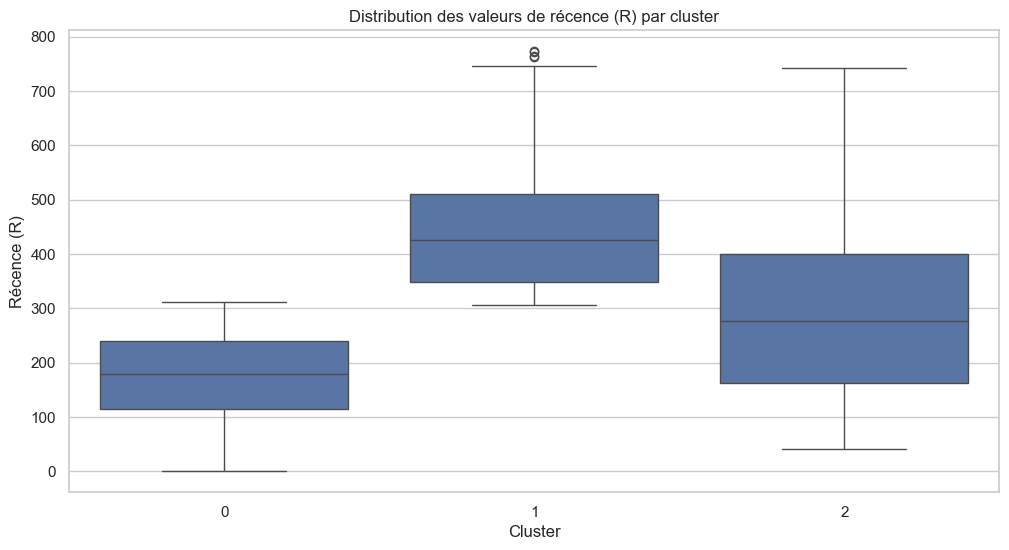

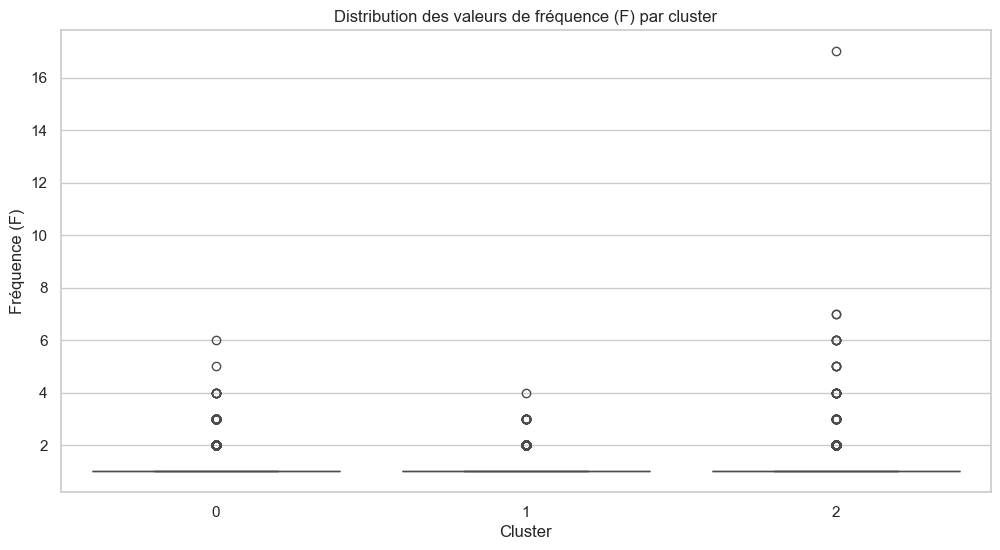

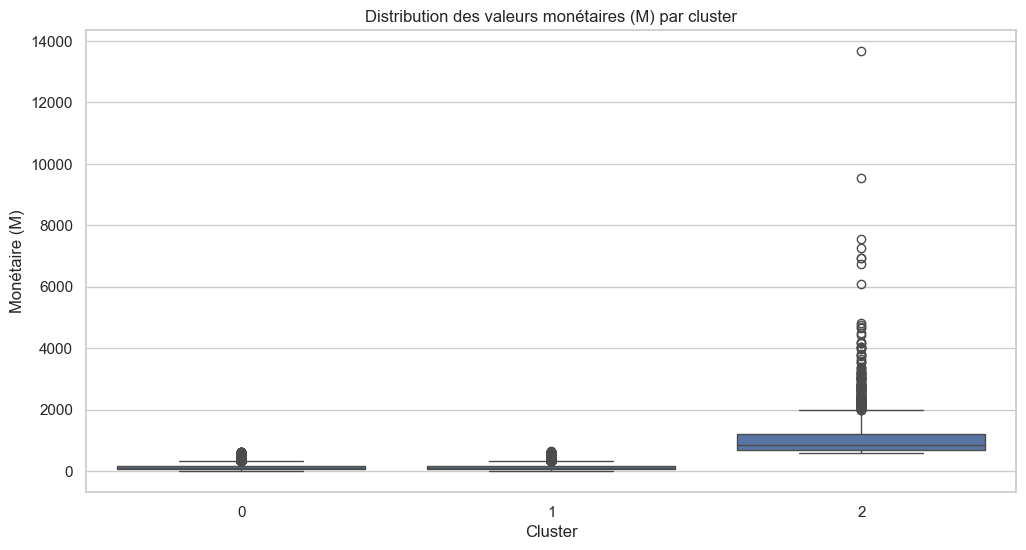

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de l'apparence des graphiques
sns.set(style="whitegrid")

# Plot de la distribution des valeurs de récence par cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='R', data=rfm_data)
plt.title('Distribution des valeurs de récence (R) par cluster')
plt.xlabel('Cluster')
plt.ylabel('Récence (R)')
plt.show()

# Plot de la distribution des valeurs de fréquence par cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='F', data=rfm_data)
plt.title('Distribution des valeurs de fréquence (F) par cluster')
plt.xlabel('Cluster')
plt.ylabel('Fréquence (F)')
plt.show()

# Plot de la distribution des valeurs monétaires par cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='M', data=rfm_data)
plt.title('Distribution des valeurs monétaires (M) par cluster')
plt.xlabel('Cluster')
plt.ylabel('Monétaire (M)')
plt.show()